### Import Libraries

In [1]:
#conda create -n venv_name
#conda activate venv_name
#conda install pip
#pip install pandas
#pip install ipykernel
#pip install ...

#conda install python=3.6
#pip install tensorflow

#pip install pipreqs
#pipreqs /path/to/project

In [2]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.7 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 30.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 35.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updat

In [3]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix

# Deep Learning
import tensorflow as tf

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

2025-08-12 02:03:29.694700: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-12 02:03:29.779763: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-12 02:03:31.659804: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


TensorFlow Version: 2.19.0
GPU Available: []


In [4]:
import kagglehub

path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████| 98.8M/98.8M [00:03<00:00, 26.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1


In [5]:
import os
train_dataset = pd.read_csv(os.path.join(path, 'mitbih_train.csv'), header=None)
test_dataset = pd.read_csv(os.path.join(path, 'mitbih_test.csv'), header=None)

### Pre-Processing

In [6]:
import preprocessing as pre

In [7]:
train_dataset, test_dataset = pre.resampleData(train_dataset, test_dataset)

In [8]:
X_train_normalized, X_valid_normalized, X_test_normalized, y_train, y_valid, y_test, class_labels = pre.cleanData(train_dataset, test_dataset)

### Random Forest

In [9]:
from model import randomForest

In [10]:
rf_classifier = randomForest(X_train_normalized, X_valid_normalized, y_train, y_valid)

In [11]:
y_pred_test = rf_classifier.predict(X_test_normalized)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", accuracy_test)

### Artificial Neural Network

In [12]:
from model import ann, evaluate_model

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8147 - loss: 0.5063 - val_accuracy: 0.9286 - val_loss: 0.2009
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9216 - loss: 0.2172 - val_accuracy: 0.9442 - val_loss: 0.1518
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9398 - loss: 0.1683 - val_accuracy: 0.9584 - val_loss: 0.1187
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9545 - loss: 0.1322 - val_accuracy: 0.9664 - val_loss: 0.1002
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9615 - loss: 0.1134 - val_accuracy: 0.9730 - val_loss: 0.0837
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9649 - loss: 0.1003 - val_accuracy: 0.9653 - val_loss: 0.0965
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9700 - loss: 0.0892 - val_accuracy: 0.9756 - val_loss: 0.0756
Epoch 8/50
625/625 ━━━━━━━━━━━━━━

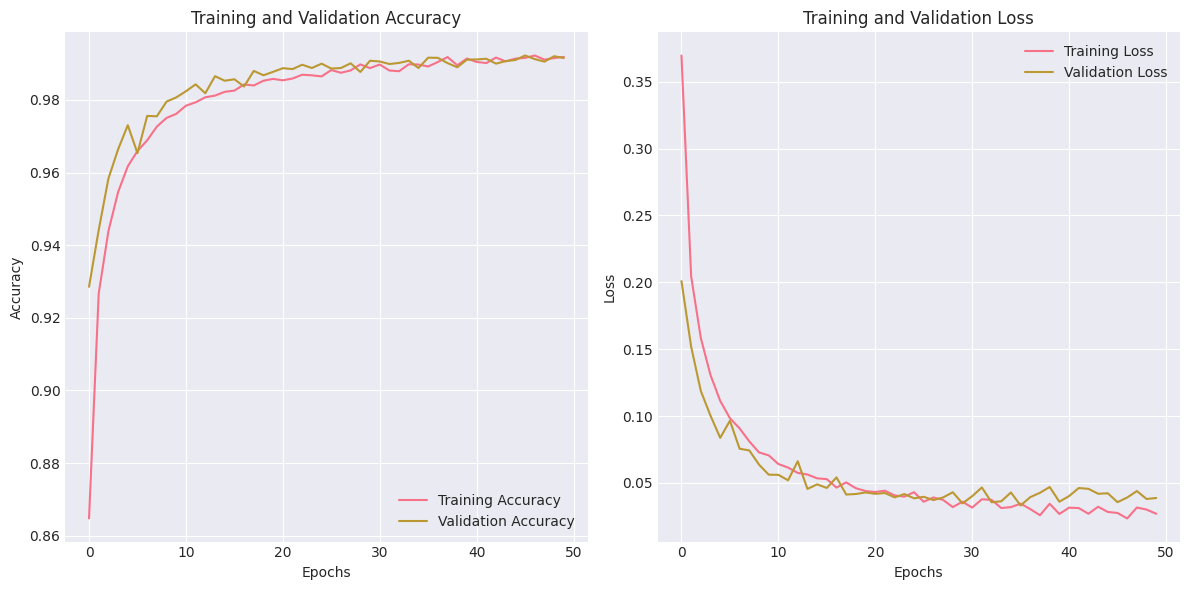

In [13]:
ann_model = ann(X_train_normalized, X_valid_normalized, y_train, y_valid)

In [14]:
y_pred_test_prob = ann_model.predict(X_test_normalized)
y_pred_test = np.argmax(y_pred_test_prob, axis=1)
y_pred_valid_prob = ann_model.predict(X_valid_normalized)
y_pred_valid = np.argmax(y_pred_valid_prob, axis=1)

accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)



accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
Validation Accuracy: 0.99165
Test Accuracy: 0.92488


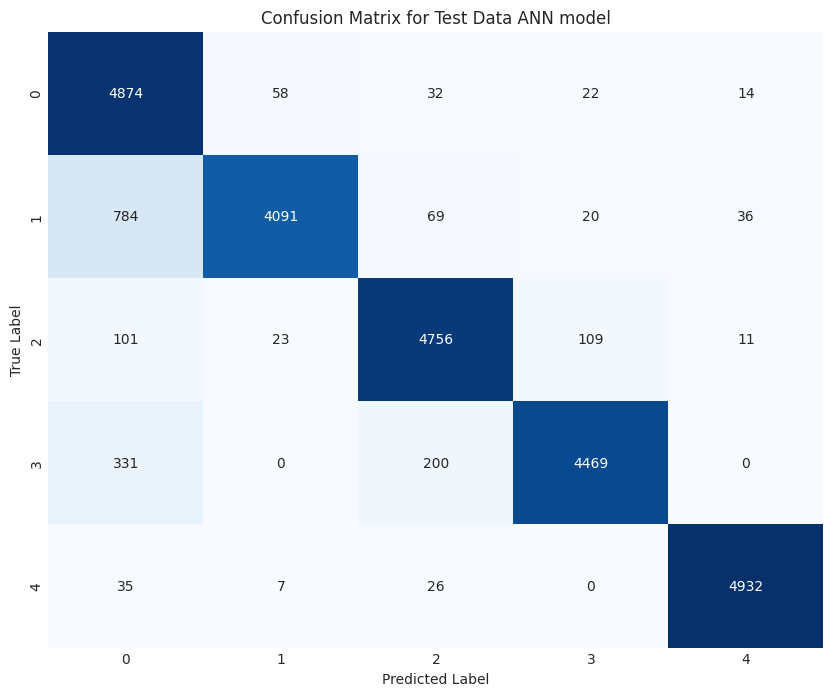

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data ANN model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

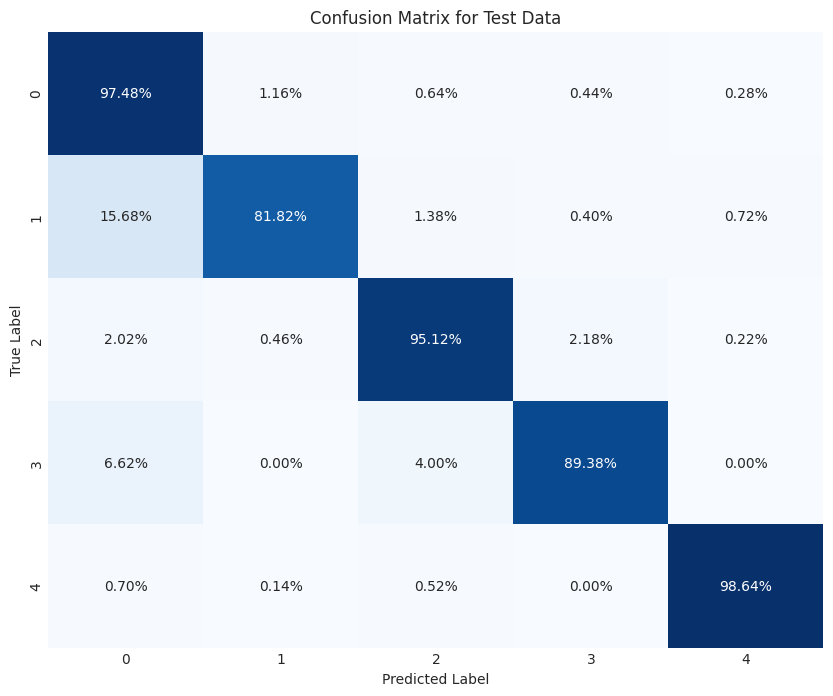

In [16]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
# Example usage:
evaluate_model(y_test, y_pred_test)

Accuracy: 0.925
Precision: 0.925
Recall: 0.925
F1-score: 0.925


In [18]:
ann_model.save("ANN_model.h5")

### Convolutional Neural Network

In [19]:
from model import cnn

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.8317 - loss: 0.5175 - val_accuracy: 0.9496 - val_loss: 0.1348
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.9363 - loss: 0.1750 - val_accuracy: 0.9676 - val_loss: 0.0909
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.9537 - loss: 0.1245 - val_accuracy: 0.9762 - val_loss: 0.0720
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9671 - loss: 0.0975 - val_accuracy: 0.9750 - val_loss: 0.0689
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9702 - loss: 0.0846 - val_accuracy: 0.9829 - val_loss: 0.0495
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9730 - loss: 0.0765 - val_accuracy: 0.9823 - val_loss: 0.0536
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.9781 - loss: 0.0639 - val_accuracy: 0.9826 - val_loss: 0.0557
Epoch

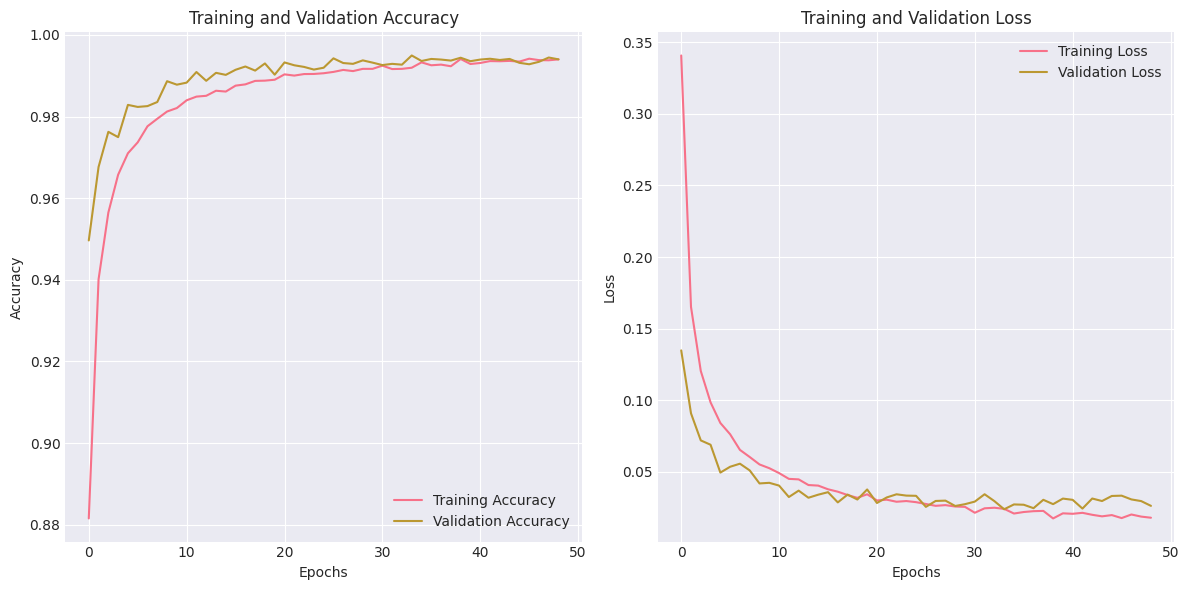

In [20]:
cnn_model = cnn(X_train_normalized, X_valid_normalized, y_train, y_valid)

In [ ]:
y_pred_test_prob = cnn_model.predict(X_test_normalized.reshape(-1, X_test_normalized.shape[1], 1))
y_pred_test = np.argmax(y_pred_test_prob, axis=1)
y_pred_valid_prob = cnn_model.predict(X_valid_normalized.reshape(-1, X_valid_normalized.shape[1], 1))
y_pred_valid = np.argmax(y_pred_valid_prob, axis=1)

accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)



accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
477/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data ANN model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
evaluate_model(y_test, y_pred_test)

In [ ]:
cnn_model.save("CNN_model.h5")

### Long-Short Term 

In [9]:
from model import lstm

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 176ms/step - accuracy: 0.4522 - loss: 1.2983 - val_accuracy: 0.4405 - val_loss: 1.2617
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.5848 - loss: 1.0519 - val_accuracy: 0.6304 - val_loss: 0.9641
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 174ms/step - accuracy: 0.6255 - loss: 0.9757 - val_accuracy: 0.6801 - val_loss: 0.8653
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.6792 - loss: 0.8743 - val_accuracy: 0.6064 - val_loss: 0.9989
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 179ms/step - accuracy: 0.6873 - loss: 0.8438 - val_accuracy: 0.7689 - val_loss: 0.6717
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.7613 - loss: 0.6878 - val_accuracy: 0.8105 - val_loss: 0.5519
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 180ms/step - accuracy: 0.7935 - loss: 0.5989 - val_accuracy: 0.8284 - val_loss: 0.4833
Epoch

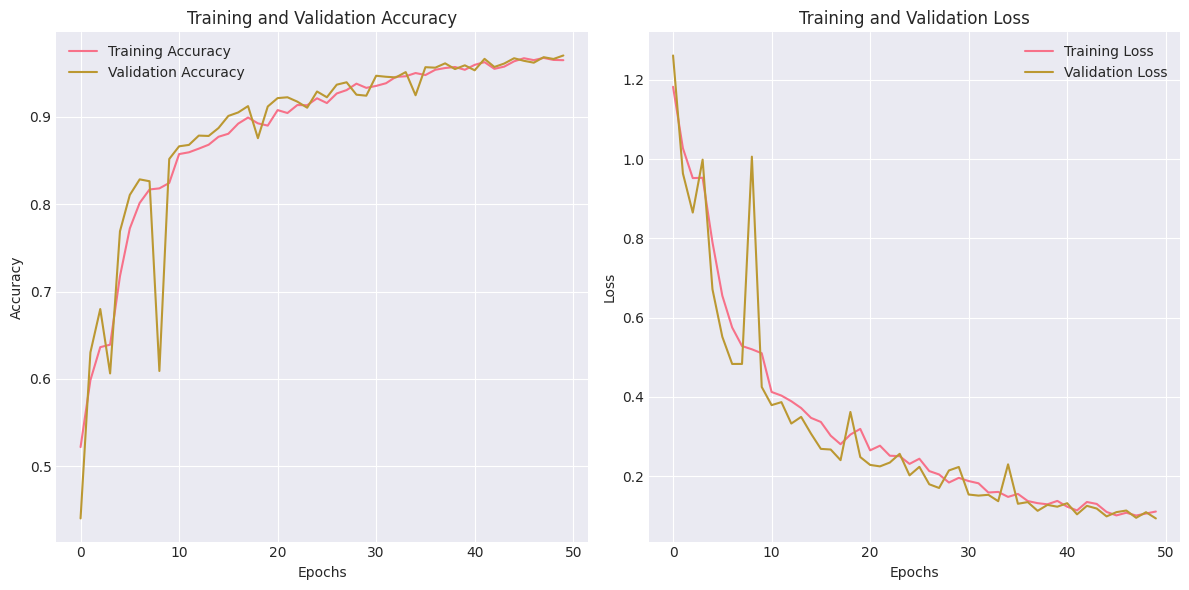

In [10]:
lstm_model = lstm(X_train_normalized, X_valid_normalized, y_train, y_valid)

In [11]:
y_pred_test_prob = lstm_model.predict(X_test_normalized.reshape(-1, X_test_normalized.shape[1], 1))
y_pred_test = np.argmax(y_pred_test_prob, axis=1)
y_pred_valid_prob = lstm_model.predict(X_valid_normalized.reshape(-1, X_valid_normalized.shape[1], 1))
y_pred_valid = np.argmax(y_pred_valid_prob, axis=1)

accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)



accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

AttributeError: 'function' object has no attribute 'predict'

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data ANN model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
evaluate_model(y_test, y_pred_test)

In [ ]:
lstm_model.save("LSTM_model.h5")

### Ensemble Model

In [ ]:
from model import ensemble_nn

In [ ]:
ensemble_preds = ensemble_nn(X_test_normalized, y_test)

In [ ]:
ensemble_preds.save("ensemble_model.h5")